In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import math


# Data Preparation

In [2]:
df = pd.read_csv("data_part_clean4.csv")
df = df[["INCIDENT_DATETIME", "ZIPCODE", "NEIGHBORHOOD"]]
df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
df["COUNT"] = pd.Series([1 for x in range(len(df.index))])

In [3]:
df['INCIDENT_DATETIME_AGG'] = df.INCIDENT_DATETIME.dt.floor("24H")

In [4]:
graphic1 = df.groupby('INCIDENT_DATETIME_AGG').COUNT.count().reset_index()
graphic1["YEAR"] = graphic1["INCIDENT_DATETIME_AGG"].dt.year
#graphic1 = graphic1.set_index("INCIDENT_DATETIME_AGG")
#time = pd.date_range(df.INCIDENT_DATETIME.min(), df.INCIDENT_DATETIME.max(), freq=str(aggregation_size)+"H")
#graphic1

# Figure 8

/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34008/411285992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graphic2["INCIDENT_DATETIME_AGG"] = graphic2["INCIDENT_DATETIME_AGG"].dt.strftime('%m-%d')
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34008/411285992.py:13: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.lineplot(data=graphic2, x = graphic2.index, y="COUNT", hue="YEAR", palette=["#e4b6ff", "#bfadff", "#6f7ae8", "red"])


[Text(0.5, 1.0, 'Daily amount of emergency calls for selected time frame')]

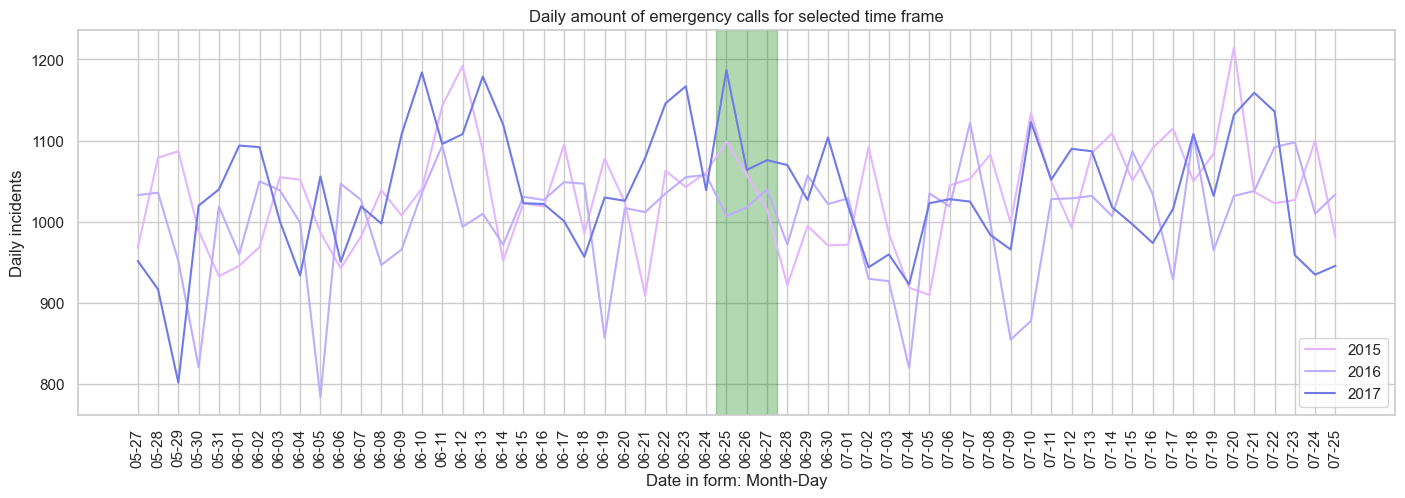

In [5]:
sns.set(rc={'figure.figsize':(17,5)})
sns.set_style("whitegrid")

mask1 = (graphic1["INCIDENT_DATETIME_AGG"]> "2015-05-26") & (graphic1["INCIDENT_DATETIME_AGG"]<"2015-07-26")
mask2 = (graphic1["INCIDENT_DATETIME_AGG"]> "2016-05-26") & (graphic1["INCIDENT_DATETIME_AGG"]<"2016-07-26")
mask3 = (graphic1["INCIDENT_DATETIME_AGG"]> "2017-05-26") & (graphic1["INCIDENT_DATETIME_AGG"]<"2017-07-26")
mask4 = (graphic1["INCIDENT_DATETIME_AGG"]> "2018-05-26") & (graphic1["INCIDENT_DATETIME_AGG"]<"2018-07-26")

graphic2 = graphic1.loc[mask1+mask2+mask3]
graphic2["INCIDENT_DATETIME_AGG"] = graphic2["INCIDENT_DATETIME_AGG"].dt.strftime('%m-%d')
graphic2 = graphic2.set_index("INCIDENT_DATETIME_AGG")

ax = sns.lineplot(data=graphic2, x = graphic2.index, y="COUNT", hue="YEAR", palette=["#e4b6ff", "#bfadff", "#6f7ae8", "red"])
plt.xticks(rotation=90)

plt.axvspan(28.5, 31.5, color='green', alpha=0.3)
plt.legend(loc='lower right')
ax.set(xlabel="Date in form: Month-Day")
ax.set(ylabel="Daily incidents")
ax.set(title="Daily amount of emergency calls for selected time frame")

# Figure 9

/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34008/3013555579.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graphic2["INCIDENT_DATETIME_AGG"] = graphic2["INCIDENT_DATETIME_AGG"].dt.strftime('%m-%d')


[Text(0.5, 1.0, 'Daily amount of emergency calls for selected time frame with periods that are utilized in the MEDIC method \n time frame of interest (green) \n utilized previous values (grey)')]

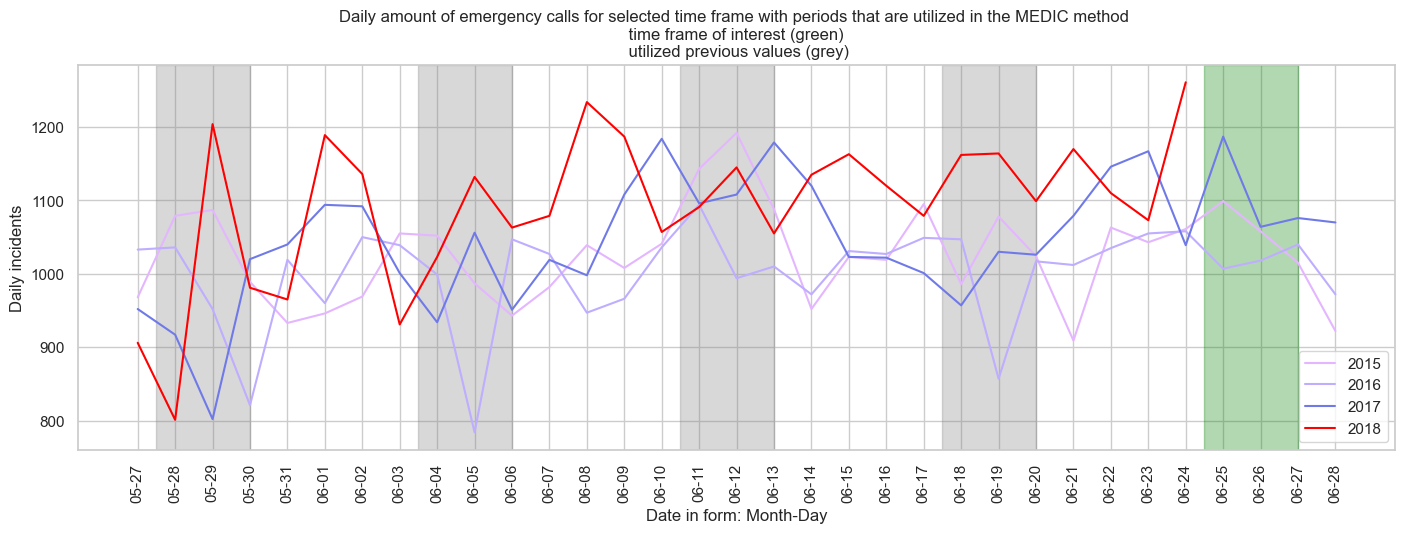

In [6]:
mask1 = (graphic1["INCIDENT_DATETIME_AGG"]> "2015-05-26") & (graphic1["INCIDENT_DATETIME_AGG"]<"2015-06-29")
mask2 = (graphic1["INCIDENT_DATETIME_AGG"]> "2016-05-26") & (graphic1["INCIDENT_DATETIME_AGG"]<"2016-06-29")
mask3 = (graphic1["INCIDENT_DATETIME_AGG"]> "2017-05-26") & (graphic1["INCIDENT_DATETIME_AGG"]<"2017-06-29")
mask4 = (graphic1["INCIDENT_DATETIME_AGG"]> "2018-05-26") & (graphic1["INCIDENT_DATETIME_AGG"]<"2018-06-25")

graphic2 = graphic1.loc[mask1+mask2+mask3+mask4]
graphic2["INCIDENT_DATETIME_AGG"] = graphic2["INCIDENT_DATETIME_AGG"].dt.strftime('%m-%d')
graphic2 = graphic2.set_index("INCIDENT_DATETIME_AGG")

ax = sns.lineplot(data=graphic2, x = graphic2.index, y="COUNT", hue="YEAR", palette=["#e4b6ff", "#bfadff", "#6f7ae8", "red"])
plt.xticks(rotation=90)
plt.axvspan(0.5, 3, color='grey', alpha=0.3)
plt.axvspan(7.5, 10, color='grey', alpha=0.3)
plt.axvspan(14.5, 17, color='grey', alpha=0.3)
plt.axvspan(21.5, 24, color='grey', alpha=0.3)
plt.axvspan(28.5, 31, color='green', alpha=0.3)
plt.legend(loc='lower right')
ax.set(xlabel="Date in form: Month-Day")
ax.set(ylabel="Daily incidents")
ax.set(title="Daily amount of emergency calls for selected time frame with periods that are utilized in the MEDIC method \n time frame of interest (green) \n utilized previous values (grey)")

# Figure 11

In [7]:
df = pd.read_csv("data_part_clean4.csv")
df = df[["INCIDENT_DATETIME", "ZIPCODE", "NEIGHBORHOOD"]]
df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
df["COUNT"] = pd.Series([1 for x in range(len(df.index))])

df['INCIDENT_DATETIME_AGG'] = df.INCIDENT_DATETIME.dt.floor("24H")

graphic1 = df.groupby('INCIDENT_DATETIME_AGG').COUNT.count().reset_index()
graphic1["YEAR"] = graphic1["INCIDENT_DATETIME_AGG"].dt.year
graphic1



,INCIDENT_DATETIME_AGG,COUNT,YEAR
0,2015-01-01,1287,2015
1,2015-01-02,854,2015
2,2015-01-03,853,2015
3,2015-01-04,750,2015
4,2015-01-05,872,2015
...,...,...,...
1456,2018-12-27,962,2018
1457,2018-12-28,1090,2018
1458,2018-12-29,982,2018
1459,2018-12-30,909,2018


In [8]:
graphic1_2015 = graphic1[graphic1.INCIDENT_DATETIME_AGG.dt.year == 2015]
graphic1_2016 = graphic1[graphic1.INCIDENT_DATETIME_AGG.dt.year == 2016]
graphic1_2017 = graphic1[graphic1.INCIDENT_DATETIME_AGG.dt.year == 2017]
graphic1_2018 = graphic1[graphic1.INCIDENT_DATETIME_AGG.dt.year == 2018]

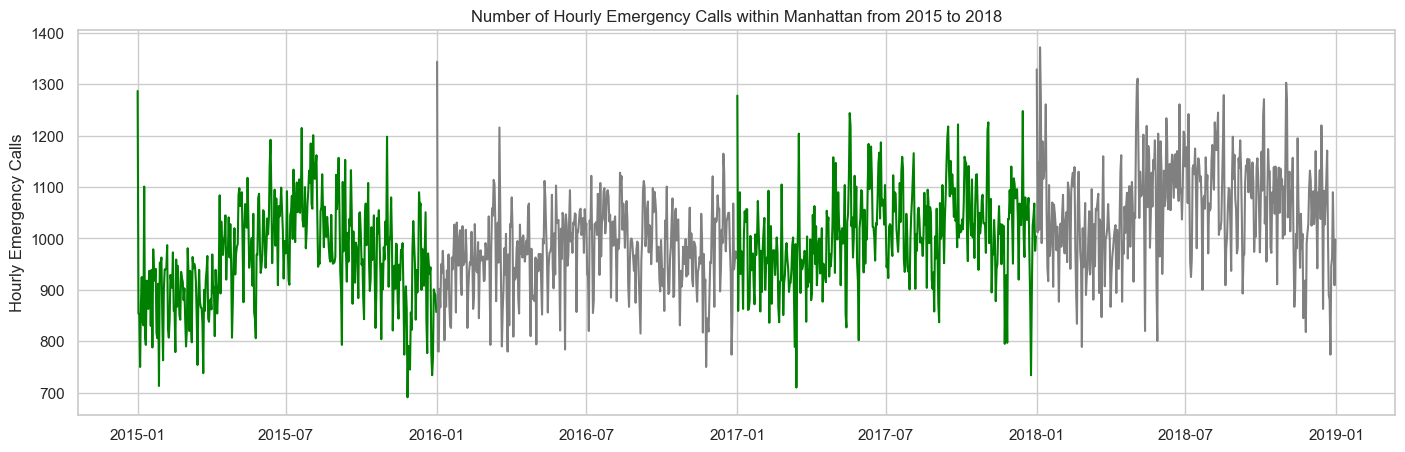

In [9]:
sns.lineplot(data=graphic1_2015, x="INCIDENT_DATETIME_AGG", y="COUNT", color="green")
sns.lineplot(data=graphic1_2016, x="INCIDENT_DATETIME_AGG", y="COUNT", color="grey")
sns.lineplot(data=graphic1_2017, x="INCIDENT_DATETIME_AGG", y="COUNT", color="green")
sns.lineplot(data=graphic1_2018, x="INCIDENT_DATETIME_AGG", y="COUNT", color="grey")
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel("")
plt.ylabel("Hourly Emergency Calls")
plt.title("Number of Hourly Emergency Calls within Manhattan from 2015 to 2018")
#jo
sns.set_style("whitegrid")

# Figure 2

In [10]:
# creating population density reference
density_reference = pd.read_csv("density_reference3.csv", delimiter=";") # load reference table
columns_list = density_reference.columns.tolist()[1:] # create list of column names
density_reference = pd.melt(density_reference, id_vars="nid", value_vars=columns_list, var_name="HOUR", value_name="POPULATION") # wide to long format
density_reference.HOUR = pd.to_numeric(density_reference.HOUR) # reformat datatype
density_reference.POPULATION = pd.to_numeric(density_reference.POPULATION) # reformat datatype
density_reference["WEEKDAY"] = np.floor(density_reference.HOUR/24) # new column for weekday number
density_reference["HOUR"] = density_reference.HOUR%24 # make hours count to 23 instead of 167
density_reference["1H"] = (density_reference.HOUR//1)*1 # add aggregation sum
density_reference["4H"] = (density_reference.HOUR//4)*4 # add aggregation sum
density_reference["12H"] = (density_reference.HOUR//12)*12 # add aggregation sum
density_reference_1H = density_reference.groupby(["nid", "WEEKDAY", "1H"]).POPULATION.sum().reset_index() # create reference table
density_reference_4H = density_reference.groupby(["nid", "WEEKDAY", "4H"]).POPULATION.sum().reset_index() # create reference table
density_reference_12H = density_reference.groupby(["nid", "WEEKDAY", "12H"]).POPULATION.sum().reset_index() # create reference table

In [11]:
density_reference_plot = density_reference_1H["POPULATION"]

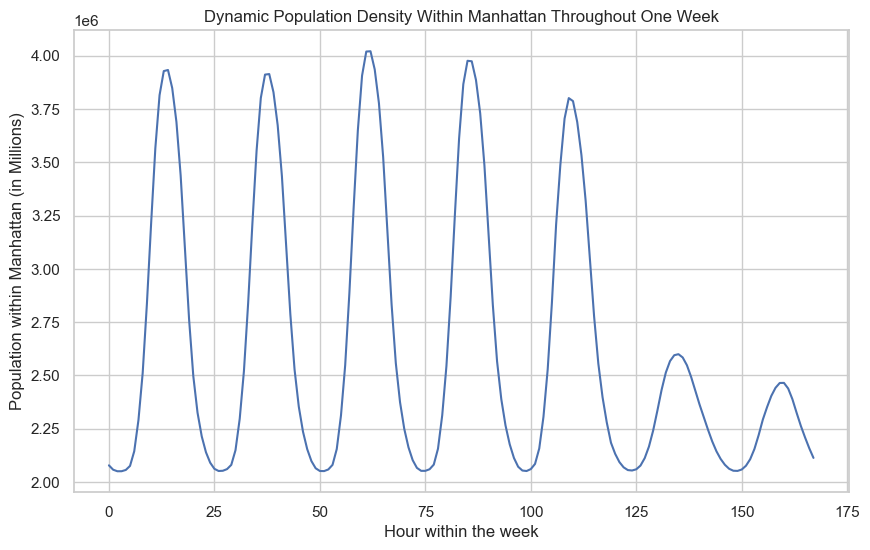

In [12]:
sns.lineplot(data=density_reference_plot)
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel("Hour within the week")
plt.ylabel("Population within Manhattan (in Millions)")
plt.title("Dynamic Population Density Within Manhattan Throughout One Week")
sns.set_style("white")
#plt.ticklabel_format(style='plain') #

# Figure 1

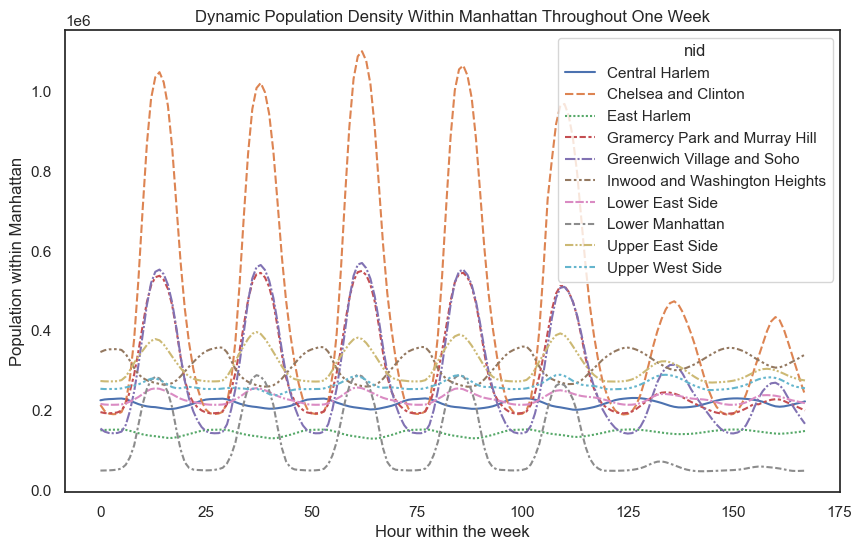

In [13]:
# creating population density reference
density_reference = pd.read_csv("density_reference.csv", delimiter=";") # load reference table
columns_list = density_reference.columns.tolist()[1:] # create list of column names
density_reference = pd.melt(density_reference, id_vars="nid", value_vars=columns_list, var_name="HOUR", value_name="POPULATION") # wide to long format
density_reference.HOUR = pd.to_numeric(density_reference.HOUR) # reformat datatype
density_reference.POPULATION = pd.to_numeric(density_reference.POPULATION) # reformat datatype
density_reference["WEEKDAY"] = np.floor(density_reference.HOUR/24) # new column for weekday number
density_reference["HOUR"] = density_reference.HOUR%24 # make hours count to 23 instead of 167
density_reference["1H"] = (density_reference.HOUR//1)*1 # add aggregation sum
density_reference["4H"] = (density_reference.HOUR//4)*4 # add aggregation sum
density_reference["12H"] = (density_reference.HOUR//12)*12 # add aggregation sum
density_reference_1H = density_reference.groupby(["nid", "WEEKDAY", "1H"]).POPULATION.sum().reset_index() # create reference table
density_reference_4H = density_reference.groupby(["nid", "WEEKDAY", "4H"]).POPULATION.sum().reset_index() # create reference table
density_reference_12H = density_reference.groupby(["nid", "WEEKDAY", "12H"]).POPULATION.sum().reset_index() # create reference table


#density_reference_1H.nid.unique()


density_reference_plot = density_reference_1H[density_reference_1H["nid"]=="Central Harlem"]  
density_reference_plot = density_reference_plot.reset_index()
density_reference_plot = density_reference_plot[["nid","POPULATION"]]

density_reference_plot2 = density_reference_1H[density_reference_1H["nid"]=="Chelsea and Clinton"]  
density_reference_plot2 = density_reference_plot2.reset_index()
density_reference_plot2 = density_reference_plot2[["nid","POPULATION"]]

density_reference_plot3 = density_reference_1H[density_reference_1H["nid"]=="East Harlem"]  
density_reference_plot3 = density_reference_plot3.reset_index()
density_reference_plot3 = density_reference_plot3[["nid","POPULATION"]]

density_reference_plot4 = density_reference_1H[density_reference_1H["nid"]=="Gramercy Park and Murray Hill"]  
density_reference_plot4 = density_reference_plot4.reset_index()
density_reference_plot4 = density_reference_plot4[["nid","POPULATION"]]

density_reference_plot5 = density_reference_1H[density_reference_1H["nid"]=="Greenwich Village and Soho"]  
density_reference_plot5 = density_reference_plot5.reset_index()
density_reference_plot5 = density_reference_plot5[["nid","POPULATION"]]

density_reference_plot6 = density_reference_1H[density_reference_1H["nid"]=="Inwood and Washington Heights"]  
density_reference_plot6 = density_reference_plot6.reset_index()
density_reference_plot6 = density_reference_plot6[["nid","POPULATION"]]

density_reference_plot7 = density_reference_1H[density_reference_1H["nid"]=="Lower East Side"]  
density_reference_plot7 = density_reference_plot7.reset_index()
density_reference_plot7 = density_reference_plot7[["nid","POPULATION"]]

density_reference_plot8 = density_reference_1H[density_reference_1H["nid"]=="Lower Manhattan"]  
density_reference_plot8 = density_reference_plot8.reset_index()
density_reference_plot8 = density_reference_plot8[["nid","POPULATION"]]

density_reference_plot9 = density_reference_1H[density_reference_1H["nid"]=="Upper East Side"]  
density_reference_plot9 = density_reference_plot9.reset_index()
density_reference_plot9 = density_reference_plot9[["nid","POPULATION"]]

density_reference_plot10 = density_reference_1H[density_reference_1H["nid"]=="Upper West Side"]  
density_reference_plot10 = density_reference_plot10.reset_index()
density_reference_plot10 = density_reference_plot10[["nid","POPULATION"]]


density_reference_full = pd.concat([density_reference_plot, density_reference_plot2, density_reference_plot3, density_reference_plot4, density_reference_plot5, density_reference_plot6, density_reference_plot7, density_reference_plot8, density_reference_plot9, density_reference_plot10])


density_reference_full_pivot = density_reference_full.pivot(columns="nid", values="POPULATION")


sns.lineplot(data=density_reference_full_pivot)
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel("Hour within the week")
plt.ylabel("Population within Manhattan")
plt.title("Dynamic Population Density Within Manhattan Throughout One Week")
sns.set_style("white")
#plt.ticklabel_format(style='plain') #

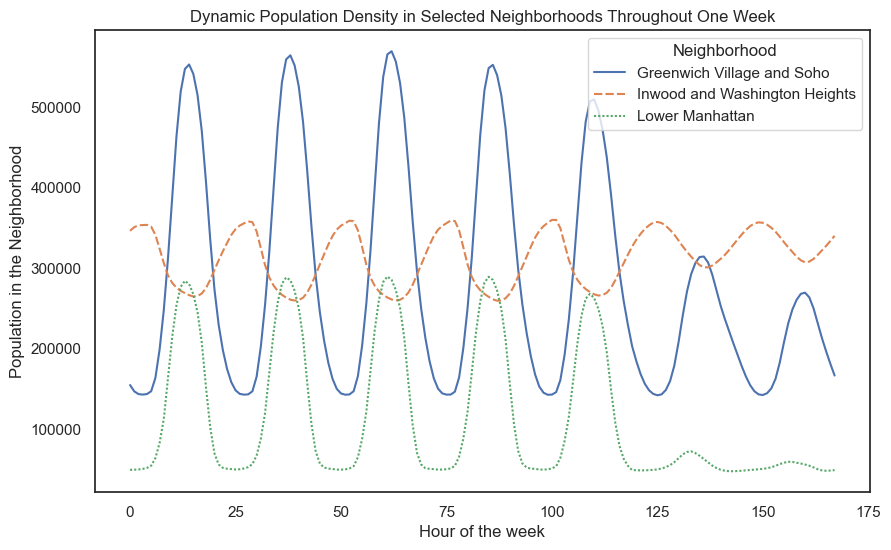

In [14]:
density_reference_full = pd.concat([density_reference_plot5, density_reference_plot6, density_reference_plot8])
density_reference_full.rename(columns={'nid':'Neighborhood'}, inplace=True)

density_reference_full_pivot = density_reference_full.pivot(columns="Neighborhood", values="POPULATION")


sns.lineplot(data=density_reference_full_pivot)
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel("Hour of the week")
plt.ylabel("Population in the Neighborhood")
plt.title("Dynamic Population Density in Selected Neighborhoods Throughout One Week")
sns.set_style("whitegrid")
#plt.ticklabel_format(style='plain') #

# Figure 6

In [15]:
df = pd.DataFrame(index=pd.date_range(start='6/1/2020', end='6/2/2020', freq='min')[:-1])

df["x"]=np.linspace(0, 24 * 60 - 1, 24 * 60, dtype=int)
df

df["x_norm"] = 2 * math.pi * df["x"] / df["x"].max()
df["cos_x"] = np.cos(df["x_norm"])
df["sin_x"] = np.sin(df["x_norm"])

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.x_norm, y=df.cos_x, name='cos(x)'))
fig.add_trace(go.Scatter(x=df.x_norm, y=df.sin_x, name='sin(x)'))

#annotation
fig.add_annotation(dict(font=dict(color='black',size=20),
                                        x=1.52,
                                        y=0,
                                        showarrow=False,
                                        text="X",
                                        textangle=0,
                                        xanchor='left'))
fig.add_annotation(dict(font=dict(color='black',size=20),
                                        x=4.65,
                                        y=0,
                                        showarrow=False,
                                        text="X",
                                        textangle=0,
                                        xanchor='left'))
fig.add_annotation(dict(font=dict(color='black',size=14),
                                        x=1.7,
                                        y=0,
                                        showarrow=False,
                                        text="<- - - - - same cosine value but at different times - - - - - ->",
                                        textangle=0,
                                        xanchor='left'))                                        

fig.update_layout(
    title="Schematic Representation of Cyclical Encoding",
    xaxis_title="Hours of Day, Day of Month, or Month of Year rescaled and converted into radians from 0 to 2π",
    template = "plotly_white"
)

fig.show()